In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

In [2]:
from qiskit_experiments.framework import BatchExperiment
from qiskit_experiments.library import QuantumVolume
from qiskit import Aer
from qiskit.providers.aer import AerSimulator

# For simulation
from qiskit.test.mock import FakeSydney

backend = AerSimulator.from_backend(FakeSydney())

In [3]:
qubits = 4 # Can use specific qubits. for example [2, 4, 7, 10]

qv_exp = QuantumVolume(qubits, seed=42)
# Transpile options like optimization_level affect only the real device run and not the simulation run
# Run options affect both simulation and real device runs
qv_exp.set_transpile_options(optimization_level=3)

# Run experiment
expdata = qv_exp.run(backend).block_for_results()

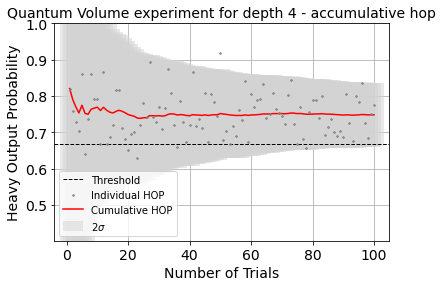

DbAnalysisResultV1
- name: mean_HOP
- value: 0.748125 ± 0.04340898344525013
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False
DbAnalysisResultV1
- name: quantum_volume
- value: 1
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False


In [4]:
# View result data
display(expdata.figure(0))

for result in expdata.analysis_results():
    print(result)

In [5]:
# Print extra data
for result in expdata.analysis_results():
    print(f"\n{result.name} extra:")
    for key, val in result.extra.items():
        print(f"- {key}: {val}")


mean_HOP extra:
- HOPs: [0.8203125, 0.759765625, 0.7294921875, 0.703125, 0.859375, 0.6396484375, 0.7353515625, 0.8603515625, 0.791015625, 0.791015625, 0.6689453125, 0.865234375, 0.6669921875, 0.685546875, 0.7197265625, 0.81640625, 0.8173828125, 0.712890625, 0.6826171875, 0.650390625, 0.6943359375, 0.7001953125, 0.6279296875, 0.7197265625, 0.7802734375, 0.7412109375, 0.892578125, 0.7431640625, 0.7275390625, 0.7685546875, 0.7099609375, 0.7666015625, 0.875, 0.8076171875, 0.7197265625, 0.6591796875, 0.7861328125, 0.7275390625, 0.673828125, 0.71875, 0.865234375, 0.716796875, 0.7353515625, 0.7109375, 0.8076171875, 0.6728515625, 0.8056640625, 0.7841796875, 0.7451171875, 0.9189453125, 0.6787109375, 0.703125, 0.6689453125, 0.7177734375, 0.689453125, 0.7607421875, 0.732421875, 0.83984375, 0.673828125, 0.806640625, 0.7705078125, 0.7880859375, 0.7919921875, 0.833984375, 0.7392578125, 0.7490234375, 0.80859375, 0.7646484375, 0.75390625, 0.744140625, 0.7216796875, 0.8037109375, 0.8427734375, 0.72363

# Adding trails

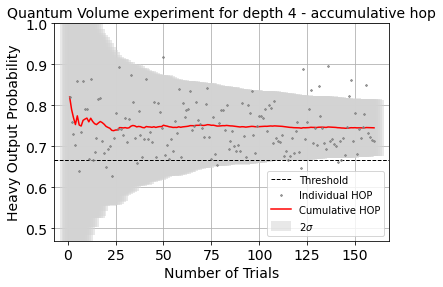

DbAnalysisResultV1
- name: mean_HOP
- value: 0.74521484375 ± 0.03444830188164787
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False
DbAnalysisResultV1
- name: quantum_volume
- value: 16
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False


In [6]:
qv_exp.set_experiment_options(trials=60)
expdata2 = qv_exp.run(backend, experiment_data=expdata).block_for_results()

# View result data
display(expdata2.figure(0))
for result in expdata2.analysis_results():
    print(result)

# Calculating Quantum Volume using a batch experiment 

In [7]:
exps = [QuantumVolume(i, trials=200) for i in range(3, 6)]
batch_exp = BatchExperiment(exps)
batch_exp.set_transpile_options(optimization_level=3)

# Run
batch_expdata = batch_exp.run(backend).block_for_results()

In [8]:
# Extracting the maximun QV
qv_values = [
    batch_expdata.component_experiment_data(i).analysis_results("quantum_volume").value
    for i in range(batch_exp.num_experiments)
]

print(f"Max quantum volume is: {max(qv_values)}")

Max quantum volume is: 16



Component experiment 0


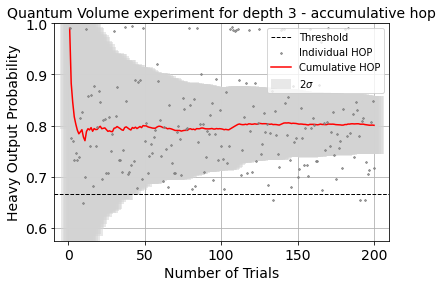

DbAnalysisResultV1
- name: mean_HOP
- value: 0.8004443359375 ± 0.028260679486087615
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: quantum_volume
- value: 8
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False

Component experiment 1


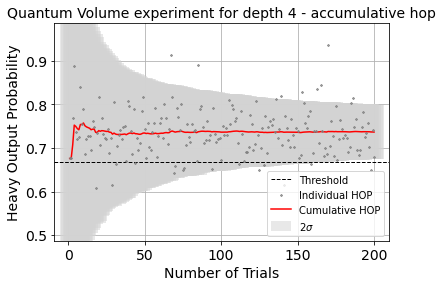

DbAnalysisResultV1
- name: mean_HOP
- value: 0.73626953125 ± 0.031159004204475572
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False
DbAnalysisResultV1
- name: quantum_volume
- value: 16
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3']
- verified: False

Component experiment 2


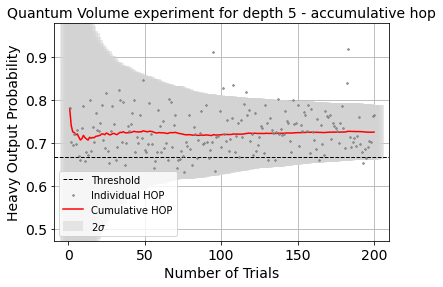

DbAnalysisResultV1
- name: mean_HOP
- value: 0.7251220703125 ± 0.03156897634214751
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3', 'Q4']
- verified: False
DbAnalysisResultV1
- name: quantum_volume
- value: 1
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2', 'Q3', 'Q4']
- verified: False


In [9]:
for i in range(batch_exp.num_experiments):
    print(f"\nComponent experiment {i}")
    sub_data = batch_expdata.component_experiment_data(i)
    display(sub_data.figure(0))
    for result in sub_data.analysis_results():
        print(result)